In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import sys
sys.path.append('../')  # Adjust the path as necessary
import dataprocessing
import feature_extractor
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Encode labels, train/test split

filepath = '../datasets/pos_B.csv'
mode = 'HP' #choose mode = 'HP', 'jerk' or 'mean'
categories = ['walking', 'standing', 'grazing', 'eating']
#Possible categories: walking, standing, grazing, eating, rubbing, scratch_biting, food_fight, climbing_up,
#brest_feeding, null (other/uncategorized behavior)

features_df = feature_extractor.extract_features(filepath, mode, categories) 

X = features_df.drop('label', axis=1)  # Features
y = features_df['label']  # Labels
#print(type(y))

# Encode labels if they're categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Normalize/Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
#TRAINING
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [4]:
#EVALUATION
predictions = rf_classifier.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions, target_names=label_encoder.classes_))


Accuracy: 0.9415584415584416
              precision    recall  f1-score   support

      eating       0.84      0.87      0.86       215
     grazing       0.95      0.91      0.93       263
    standing       0.98      0.98      0.98       380
     walking       0.96      0.97      0.97       220

    accuracy                           0.94      1078
   macro avg       0.93      0.94      0.93      1078
weighted avg       0.94      0.94      0.94      1078



All 3 AC component modes similar accuracy. jerk > HP > mean.

n_estimators = 100

test_size = 0.3


mean_acc_x      0.063254
Q5_x            0.046489
rms_ay_band5    0.041972
Q95_x           0.040199
rms_ax_band5    0.039848
mean_acc_y      0.039531
max_acc_y       0.033233
Q95_y           0.033114
Q95_ac_y        0.032637
min_acc_x       0.028372
dtype: float64


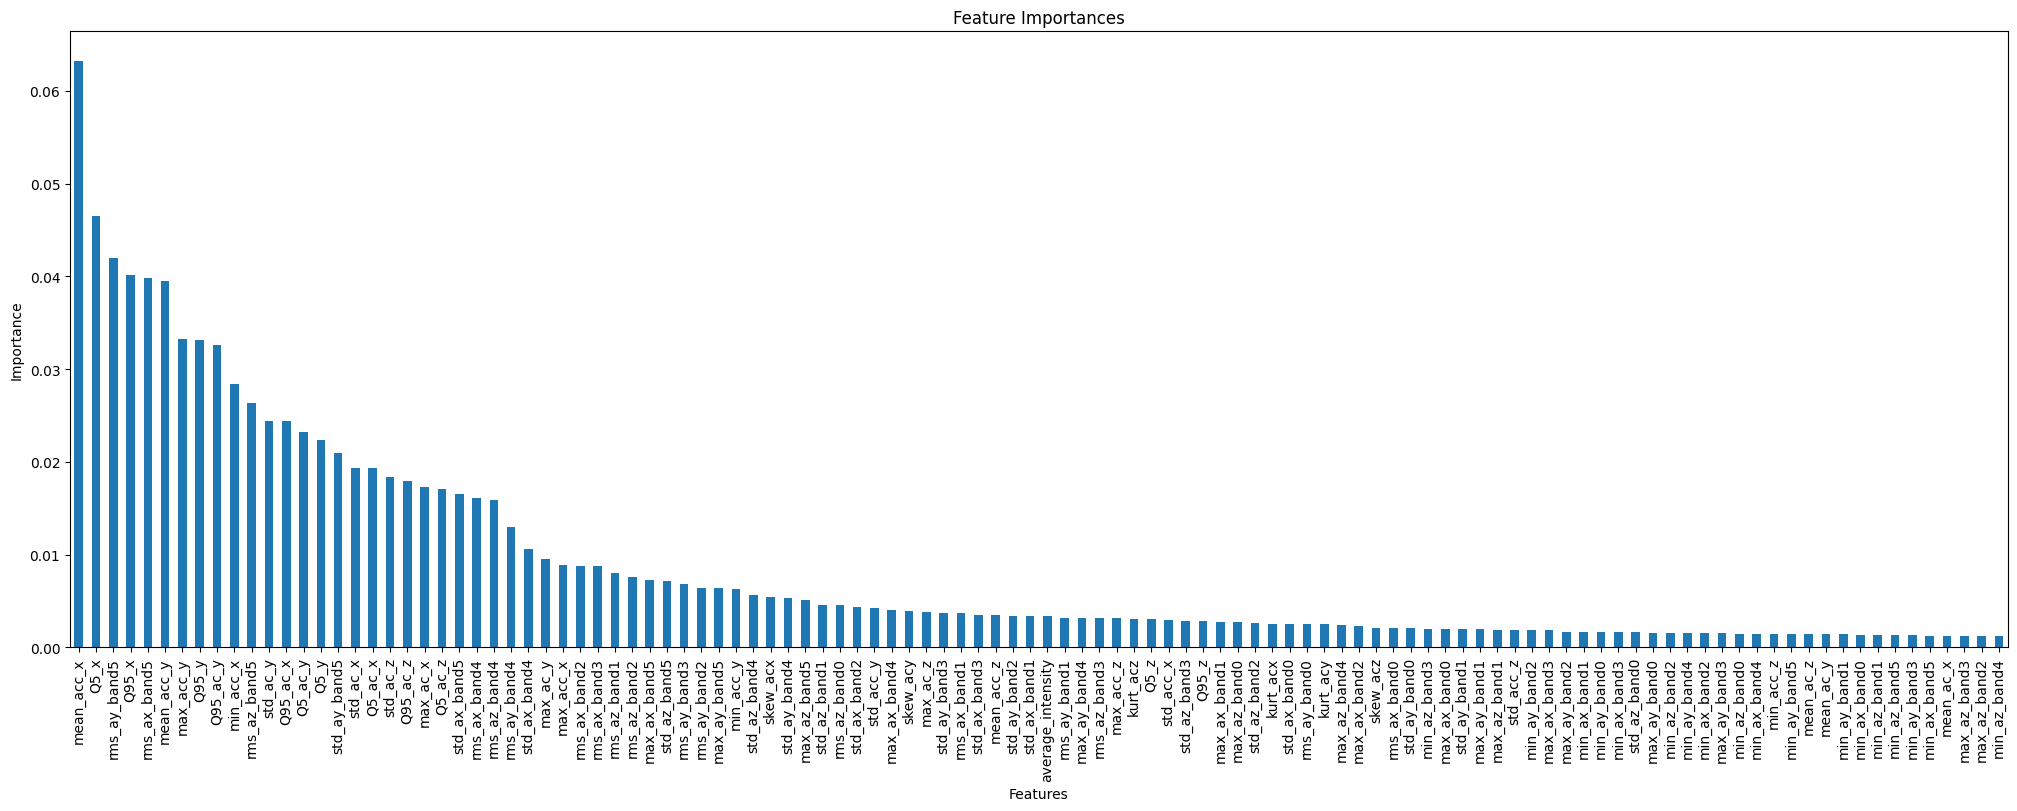

In [5]:
feature_importances = rf_classifier.feature_importances_

feature_names = X_train.columns

importances_series = pd.Series(data=feature_importances, index=feature_names)

importances_series_sorted = importances_series.sort_values(ascending=False)

print(importances_series_sorted.head(10))

plt.figure(figsize=(25,8))
importances_series_sorted.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()